# First let's import the python libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Read the csv file

In [2]:
df = pd.read_csv('weather_history.csv')
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Lets take a look at the data

In [3]:
df.shape

(96453, 12)

In [5]:
df.dtypes

Formatted Date               object
Summary                      object
Precip Type                  object
Temperature (C)             float64
Apparent Temperature (C)    float64
Humidity                    float64
Wind Speed (km/h)           float64
Wind Bearing (degrees)      float64
Visibility (km)             float64
Loud Cover                  float64
Pressure (millibars)        float64
Daily Summary                object
dtype: object

In [6]:
df.describe()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars)
count,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.000000,96453.0,96453.000000
mean,11.932678,10.855029,0.734899,10.810640,187.509232,10.347325,0.0,1003.235956
std,9.551546,10.696847,0.195473,6.913571,107.383428,4.192123,0.0,116.969906
min,-21.822222,-27.716667,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,4.688889,2.311111,0.600000,5.828200,116.000000,8.339800,0.0,1011.900000
50%,12.000000,12.000000,0.780000,9.965900,180.000000,10.046400,0.0,1016.450000
75%,18.838889,18.838889,0.890000,14.135800,290.000000,14.812000,0.0,1021.090000
max,39.905556,39.344444,1.000000,63.852600,359.000000,16.100000,0.0,1046.380000


# Convert dtype of the date column

In [7]:
df['Formatted Date'] = pd.to_datetime(df['Formatted Date'], utc=True)
df['Formatted Date'] 

0       2006-03-31 22:00:00+00:00
1       2006-03-31 23:00:00+00:00
2       2006-04-01 00:00:00+00:00
3       2006-04-01 01:00:00+00:00
4       2006-04-01 02:00:00+00:00
                   ...           
96448   2016-09-09 17:00:00+00:00
96449   2016-09-09 18:00:00+00:00
96450   2016-09-09 19:00:00+00:00
96451   2016-09-09 20:00:00+00:00
96452   2016-09-09 21:00:00+00:00
Name: Formatted Date, Length: 96453, dtype: datetime64[ns, UTC]

In [8]:
df.dtypes

Formatted Date              datetime64[ns, UTC]
Summary                                  object
Precip Type                              object
Temperature (C)                         float64
Apparent Temperature (C)                float64
Humidity                                float64
Wind Speed (km/h)                       float64
Wind Bearing (degrees)                  float64
Visibility (km)                         float64
Loud Cover                              float64
Pressure (millibars)                    float64
Daily Summary                            object
dtype: object

# Check for null values

In [9]:
#to check null values
df.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Loud Cover                    0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [10]:
#we only need 3 columns. Apparent temperature(C), humidity and formatted date as the index

df= df.set_index('Formatted Date')
df.head()

,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
Formatted Date,,,,,,,,,,,
2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


# Cleaning the dataset

In [11]:
req_cols = df[['Apparent Temperature (C)','Humidity']]

df1 = req_cols.resample('MS').mean()

df1.head()

,Apparent Temperature (C),Humidity
Formatted Date,,
2005-12-01 00:00:00+00:00,-4.050000,0.890000
2006-01-01 00:00:00+00:00,-4.173708,0.834610
2006-02-01 00:00:00+00:00,-2.990716,0.843467
2006-03-01 00:00:00+00:00,1.969780,0.778737
2006-04-01 00:00:00+00:00,12.098827,0.728625


# Plotting the data

<AxesSubplot:title={'center':'Change in the apparent temperature(C) and humidity over 10 years from 2006 to 2016'}, xlabel='Formatted Date'>

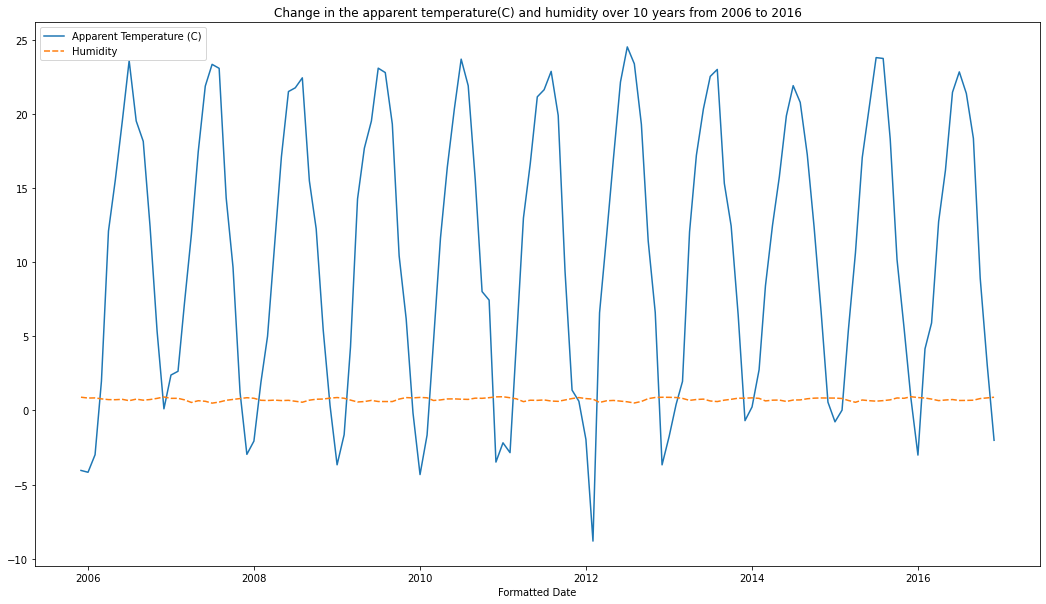

In [14]:
plt.figure(figsize=(18,10))
plt.title('Change in the apparent temperature(C) and humidity over 10 years from 2006 to 2016')
sns.lineplot(data=df1)


In [16]:
df2 = df1[df1.index.month==4]
df2

,Apparent Temperature (C),Humidity
Formatted Date,,
2006-04-01 00:00:00+00:00,12.098827,0.728625
2007-04-01 00:00:00+00:00,11.894421,0.536361
2008-04-01 00:00:00+00:00,11.183688,0.693194
2009-04-01 00:00:00+00:00,14.267076,0.567847
2010-04-01 00:00:00+00:00,11.639406,0.706875
2011-04-01 00:00:00+00:00,12.978997,0.591625
2012-04-01 00:00:00+00:00,11.782770,0.650222
2013-04-01 00:00:00+00:00,12.045563,0.677667
2014-04-01 00:00:00+00:00,12.486181,0.691403


In [17]:
import matplotlib.dates as dt

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of April')

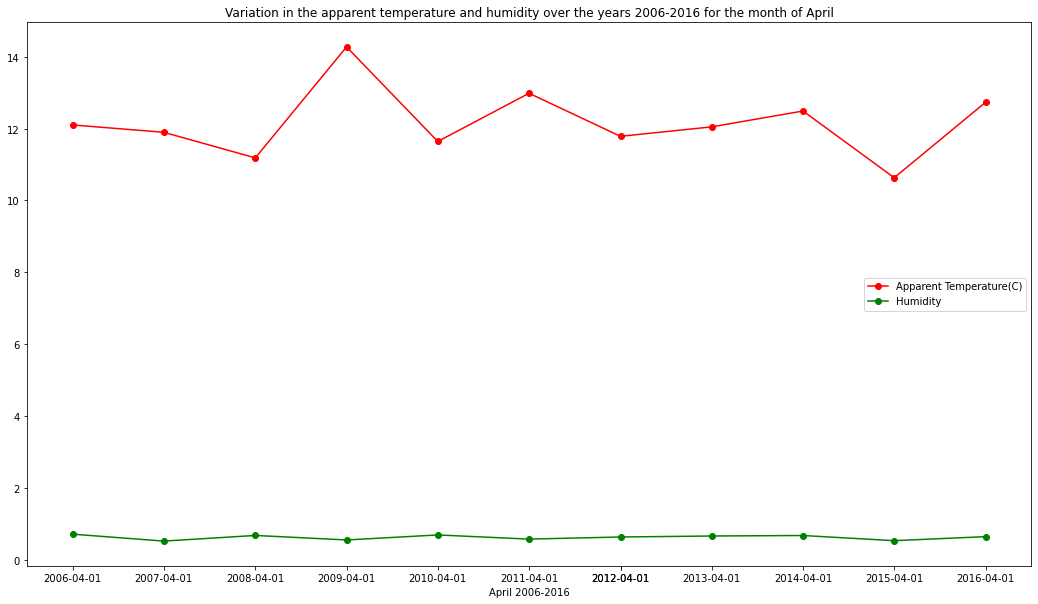

In [20]:
fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(df2.loc['2006-04-01':'2016-04-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(df2.loc['2006-04-01':'2016-04-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-04-01','2007-04-01','2008-04-01','2009-04-01',
               '2010-04-01','2011-04-01','2012-04-01','2012-04-01','2013-04-01','2014-04-01','2015-04-01','2016-04-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('April 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of April')



Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of January')

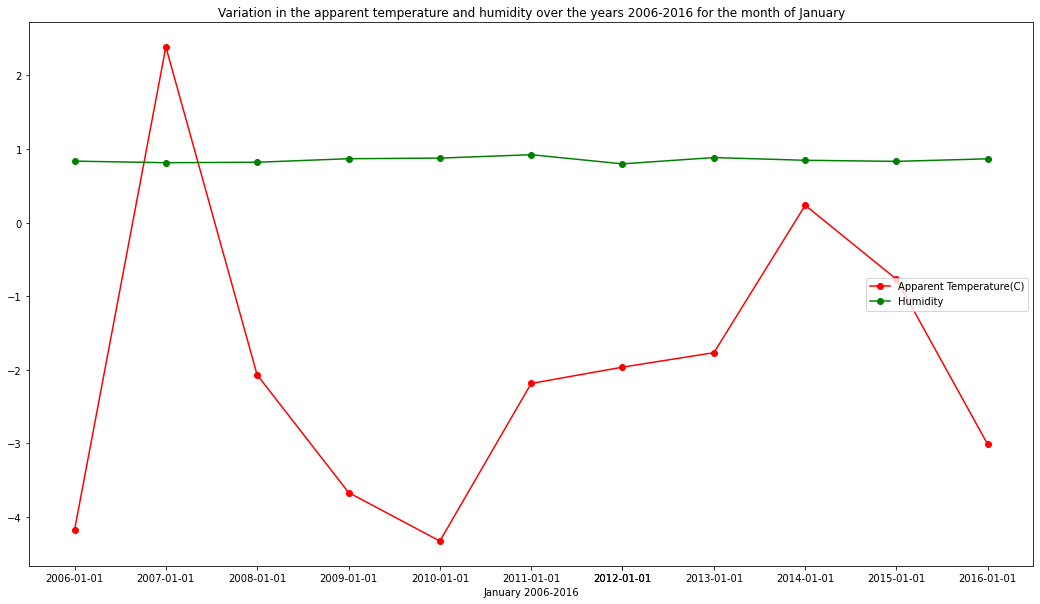

In [21]:
jan = df1[df1.index.month==1]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(jan.loc['2006-01-01':'2016-01-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(jan.loc['2006-01-01':'2016-01-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-01-01','2007-01-01','2008-01-01','2009-01-01',
               '2010-01-01','2011-01-01','2012-01-01','2012-01-01','2013-01-01','2014-01-01','2015-01-01','2016-01-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('January 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of January')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of February')

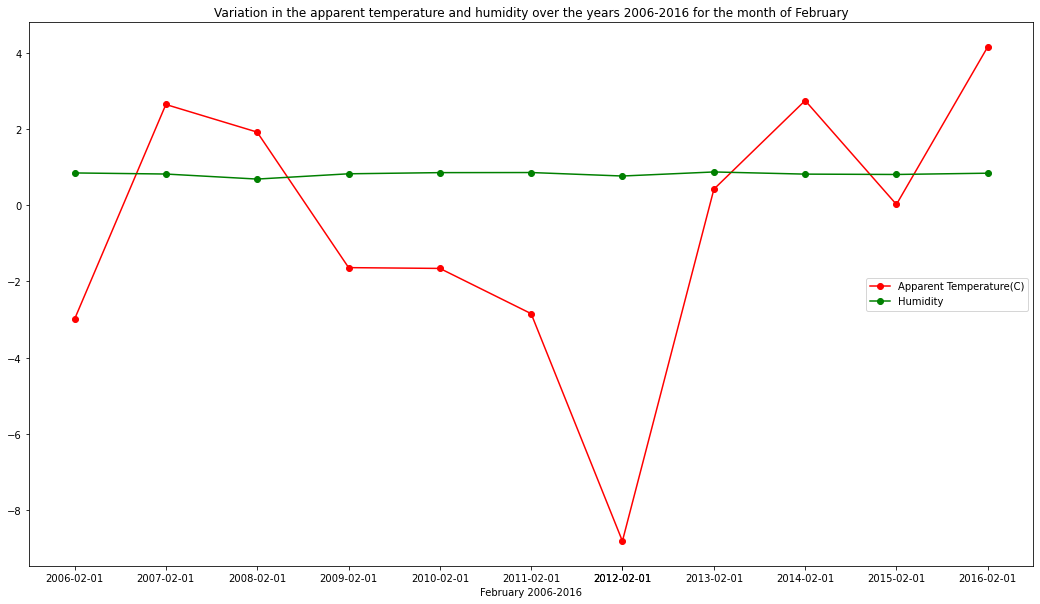

In [24]:
feb = df1[df1.index.month==2]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(feb.loc['2006-02-01':'2016-02-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(feb.loc['2006-02-01':'2016-02-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-02-01','2007-02-01','2008-02-01','2009-02-01',
               '2010-02-01','2011-02-01','2012-02-01','2012-02-01','2013-02-01','2014-02-01','2015-02-01','2016-02-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('February 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of February')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of March')

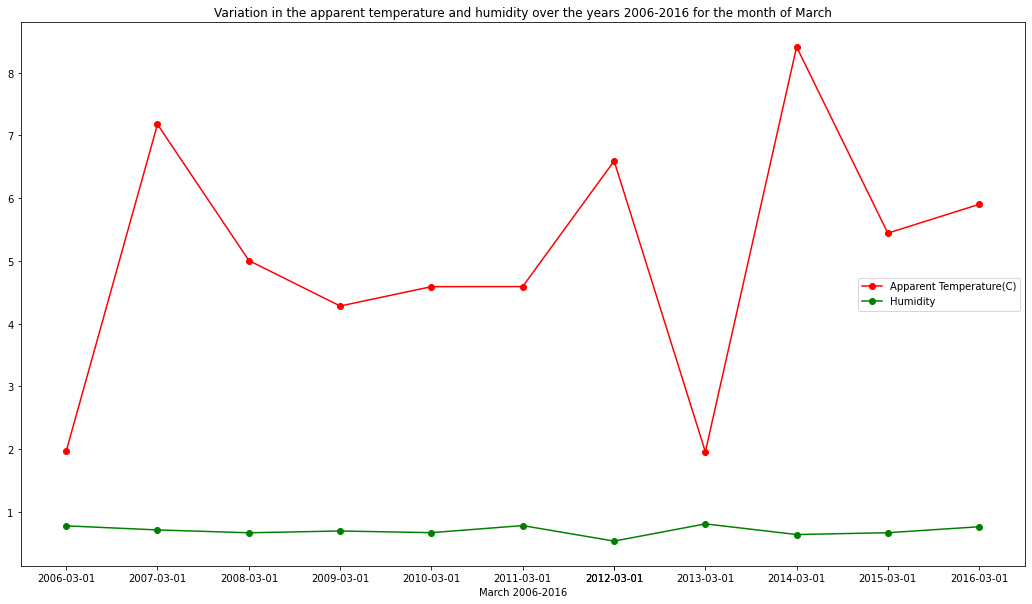

In [25]:
mar = df1[df1.index.month==3]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(mar.loc['2006-03-01':'2016-03-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(mar.loc['2006-03-01':'2016-03-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-03-01','2007-03-01','2008-03-01','2009-03-01',
               '2010-03-01','2011-03-01','2012-03-01','2012-03-01','2013-03-01','2014-03-01','2015-03-01','2016-03-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('March 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of March')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of May')

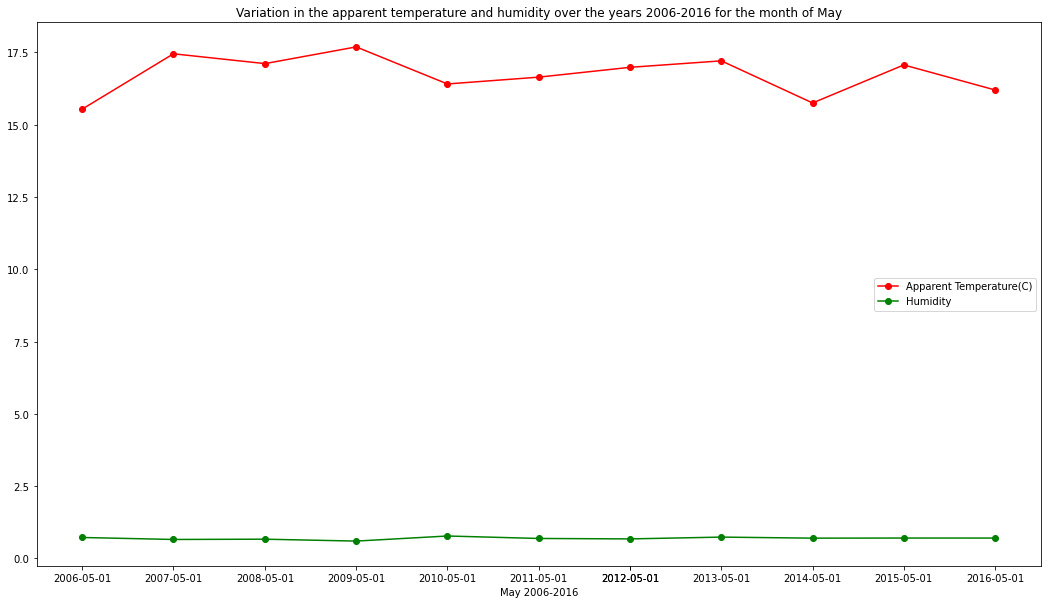

In [27]:
may = df1[df1.index.month==5]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(may.loc['2006-05-01':'2016-05-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(may.loc['2006-05-01':'2016-05-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-05-01','2007-05-01','2008-05-01','2009-05-01','2010-05-01','2011-05-01','2012-05-01','2012-05-01',
               '2013-05-01','2014-05-01','2015-05-01','2016-05-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('May 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of May')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of June')

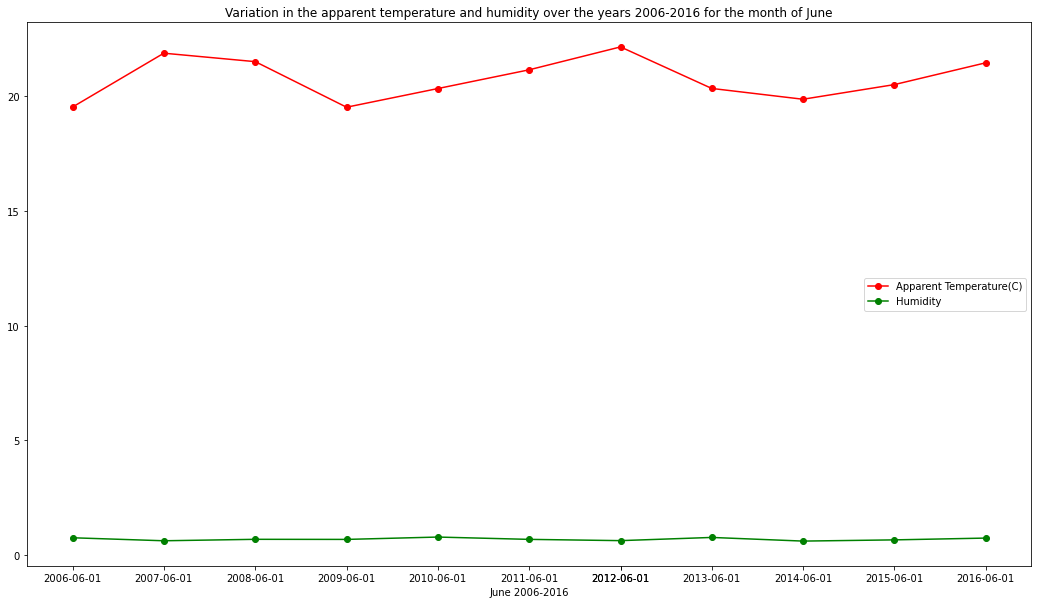

In [28]:
jun = df1[df1.index.month==6]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(jun.loc['2006-06-01':'2016-06-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(jun.loc['2006-06-01':'2016-06-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-06-01','2007-06-01','2008-06-01','2009-06-01',
               '2010-06-01','2011-06-01','2012-06-01','2012-06-01','2013-06-01','2014-06-01','2015-06-01','2016-06-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('June 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of June')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of July')

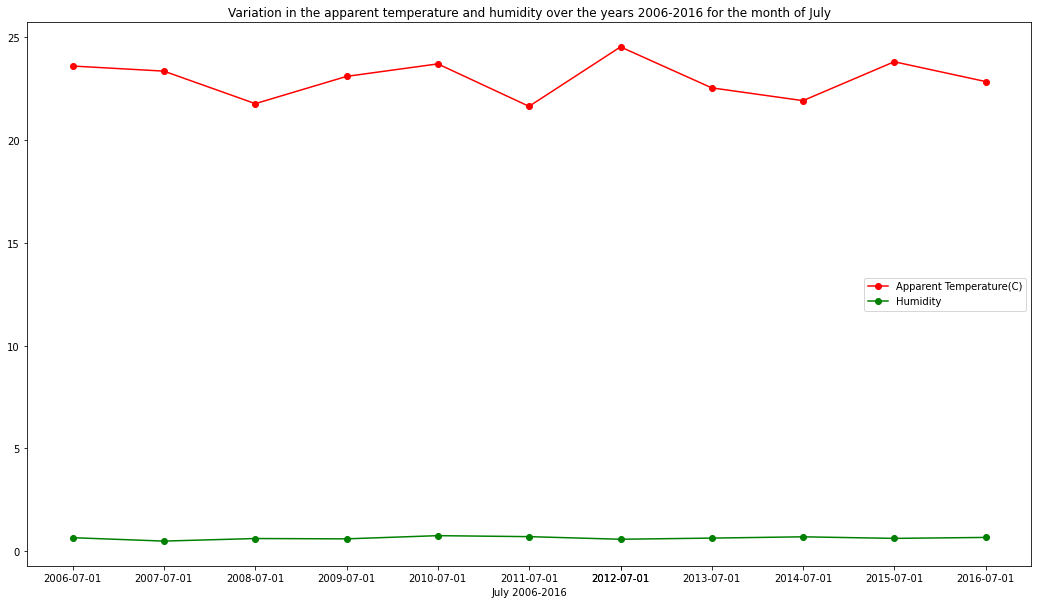

In [29]:
jul = df1[df1.index.month==7]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(jul.loc['2006-07-01':'2016-07-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(jul.loc['2006-07-01':'2016-07-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-07-01','2007-07-01','2008-07-01','2009-07-01',
               '2010-07-01','2011-07-01','2012-07-01','2012-07-01','2013-07-01','2014-07-01','2015-07-01','2016-07-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('July 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of July')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of August')

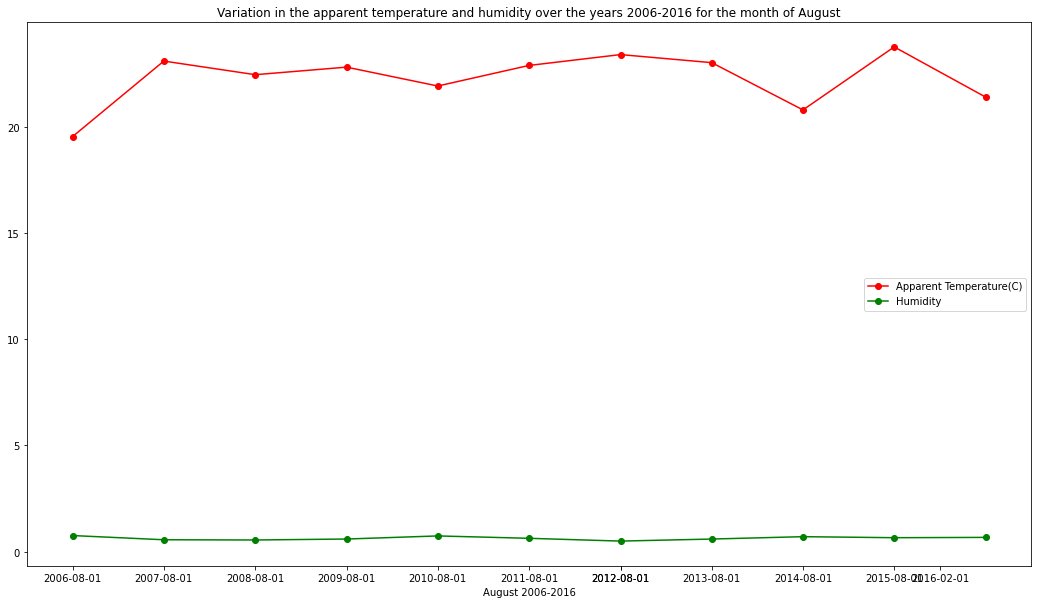

In [30]:
aug = df1[df1.index.month==8]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(aug.loc['2006-08-01':'2016-08-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(aug.loc['2006-08-01':'2016-08-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-08-01','2007-08-01','2008-08-01','2009-08-01',
               '2010-08-01','2011-08-01','2012-08-01','2012-08-01','2013-08-01','2014-08-01','2015-08-01','2016-02-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('August 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of August')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of September')

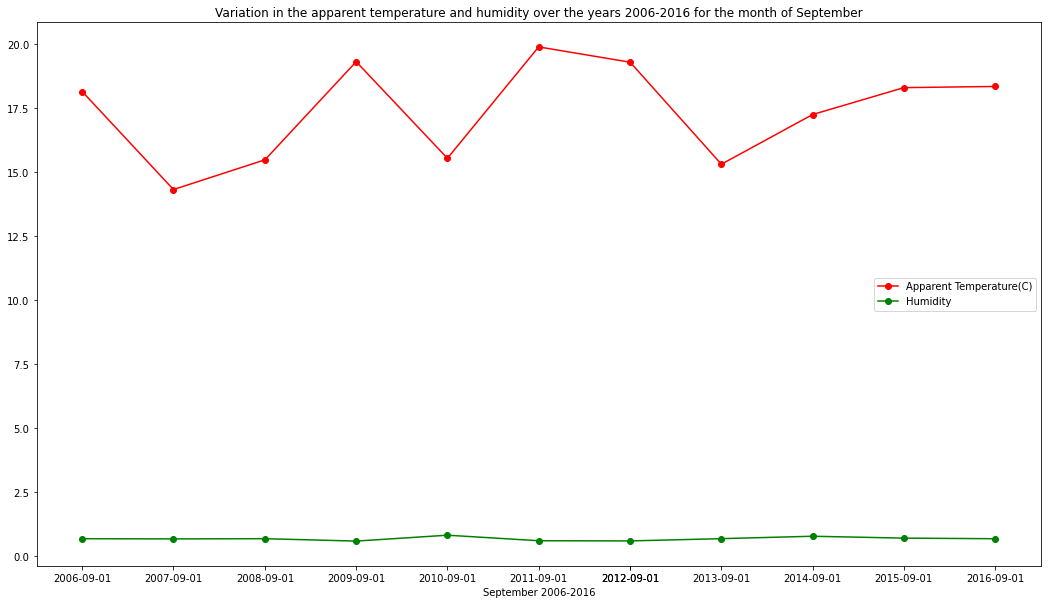

In [31]:
sep = df1[df1.index.month==9]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(sep.loc['2006-09-01':'2016-09-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(sep.loc['2006-09-01':'2016-09-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-09-01','2007-09-01','2008-09-01','2009-09-01',
               '2010-09-01','2011-09-01','2012-09-01','2012-09-01','2013-09-01','2014-09-01','2015-09-01','2016-09-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('September 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of September')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of October')

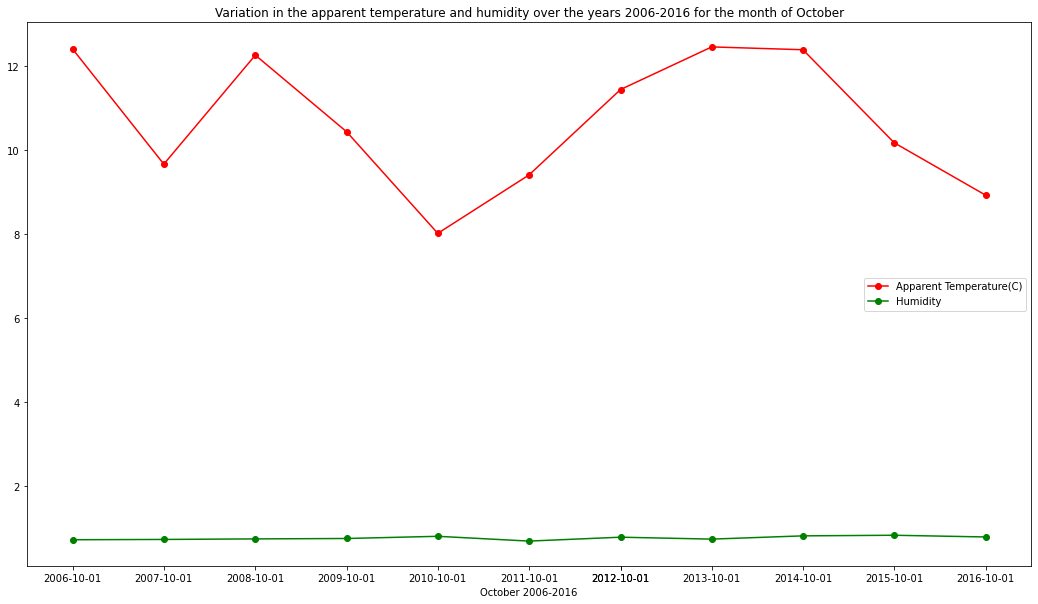

In [32]:
oct = df1[df1.index.month==10]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(oct.loc['2006-10-01':'2016-10-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(oct.loc['2006-10-01':'2016-10-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-10-01','2007-10-01','2008-10-01','2009-10-01',
               '2010-10-01','2011-10-01','2012-10-01','2012-10-01','2013-10-01','2014-10-01','2015-10-01','2016-10-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('October 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of October')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of November')

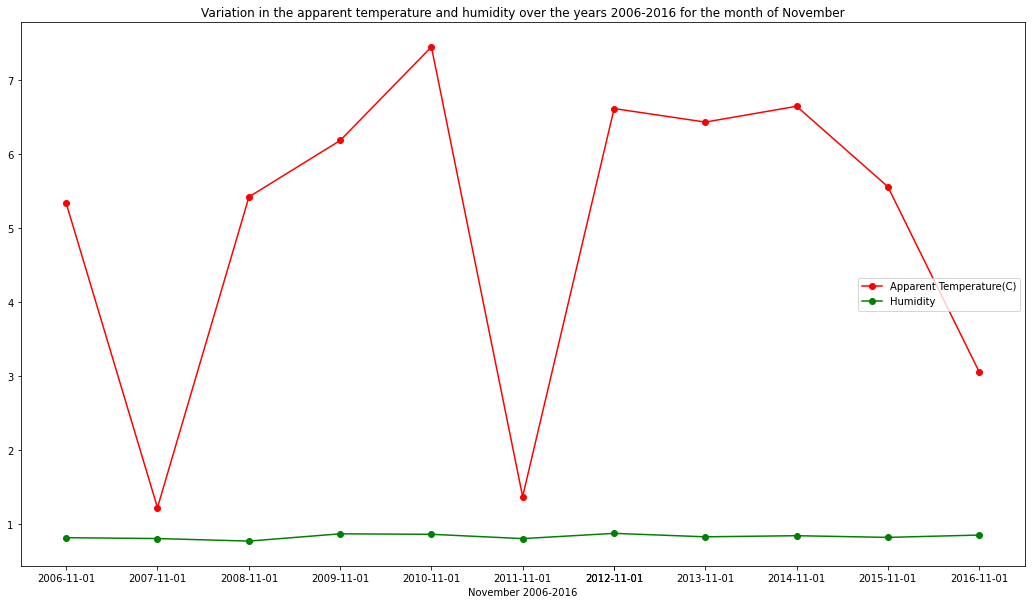

In [33]:
nov = df1[df1.index.month==11]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(nov.loc['2006-11-01':'2016-11-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(nov.loc['2006-11-01':'2016-11-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-11-01','2007-11-01','2008-11-01','2009-11-01',
               '2010-11-01','2011-11-01','2012-11-01','2012-11-01','2013-11-01','2014-11-01','2015-11-01','2016-11-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('November 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of November')

Text(0.5, 1.0, 'Variation in the apparent temperature and humidity over the years 2006-2016 for the month of December')

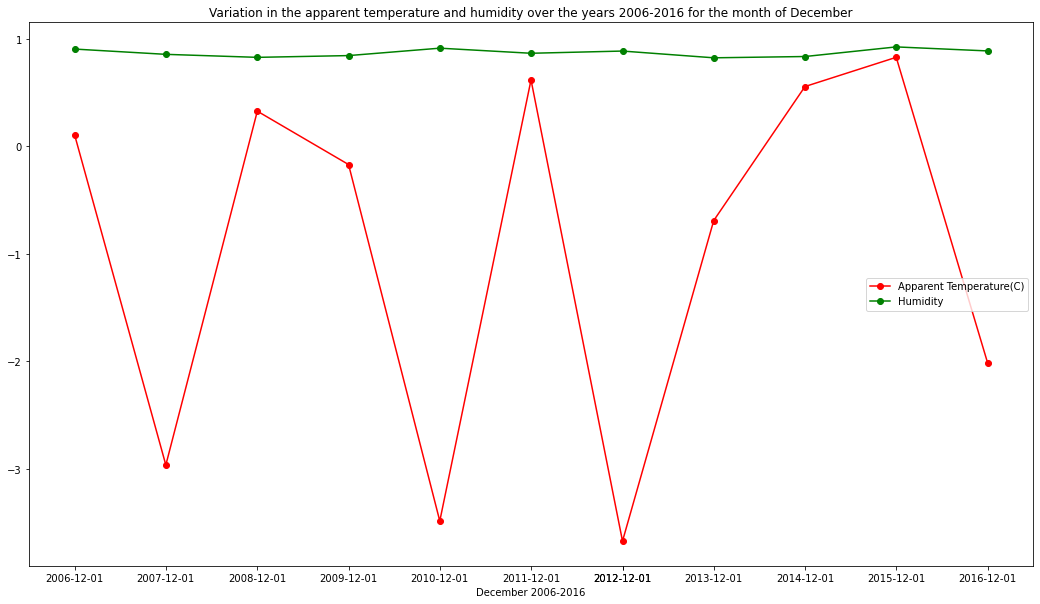

In [34]:
dec = df1[df1.index.month==12]

fig, ax =  plt.subplots(figsize=(18,10))

ax.plot(dec.loc['2006-12-01':'2016-12-01','Apparent Temperature (C)'], marker='o',color='red',linestyle='-',label='Apparent Temperature(C)')

ax.plot(dec.loc['2006-12-01':'2016-12-01','Humidity'], marker='o',color='green',linestyle='-',label='Humidity')

ax.set_xticks(['2006-12-01','2007-12-01','2008-12-01','2009-12-01',
               '2010-12-01','2011-12-01','2012-12-01','2012-12-01','2013-12-01','2014-12-01','2015-12-01','2016-12-01'])


ax.xaxis.set_major_formatter(dt.DateFormatter('%Y-%m-%d'))

ax.set_xlabel('December 2006-2016')

ax.legend(loc='center right')

plt.title('Variation in the apparent temperature and humidity over the years 2006-2016 for the month of December')